In [1]:
PATH_TO_DATA = 'sarcasm/train-balanced-sarcasm.csv'

In [2]:
# some necessary imports
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
train_df = pd.read_csv(PATH_TO_DATA)

In [4]:
train_df.head()

label                                            comment     author  \
0      0                                         NC and NH.  Trumpbart   
1      0  You do know west teams play against west teams...  Shbshb906   
2      0  They were underdogs earlier today, but since G...   Creepeth   
3      0  This meme isn't funny none of the "new york ni...  icebrotha   
4      0                    I could use one of those tools.  cush2push   

            subreddit  score  ups  downs     date          created_utc  \
0            politics      2   -1     -1  2016-10  2016-10-16 23:55:23   
1                 nba     -4   -1     -1  2016-11  2016-11-01 00:24:10   
2                 nfl      3    3      0  2016-09  2016-09-22 21:45:37   
3  BlackPeopleTwitter     -8   -1     -1  2016-10  2016-10-18 21:03:47   
4  MaddenUltimateTeam      6   -1     -1  2016-12  2016-12-30 17:00:13   

                                      parent_comment  
0  Yeah, I get that argument. At this point, I'd ...  
1  The blazers and Mavericks (The wests 5 and 6 s...  
2                            They're favored to win.  
3                         deadass don't kill my buzz  
4  Yep can confirm I saw the tool they use for th...

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
label             1010826 non-null int64
comment           1010773 non-null object
author            1010826 non-null object
subreddit         1010826 non-null object
score             1010826 non-null int64
ups               1010826 non-null int64
downs             1010826 non-null int64
date              1010826 non-null object
created_utc       1010826 non-null object
parent_comment    1010826 non-null object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB


In [6]:
train_df.dropna(subset=['comment'], inplace=True)

In [7]:
train_df['label'].value_counts()

0    505405
1    505368
Name: label, dtype: int64

In [8]:
train_texts, valid_texts, y_train, y_valid = \
        train_test_split(train_df['comment'], train_df['label'], random_state=123)

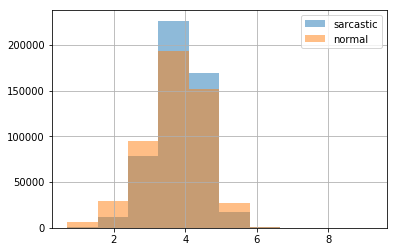

In [9]:
train_df.loc[train_df['label'] == 1, 'comment'].str.len().apply(np.log1p).hist(label='sarcastic', alpha=.5)
train_df.loc[train_df['label'] == 0, 'comment'].str.len().apply(np.log1p).hist(label='normal', alpha=.5)
plt.legend();

In [11]:
from wordcloud import WordCloud, STOPWORDS

In [12]:
wordcloud = WordCloud(background_color='black', stopwords = STOPWORDS,
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)

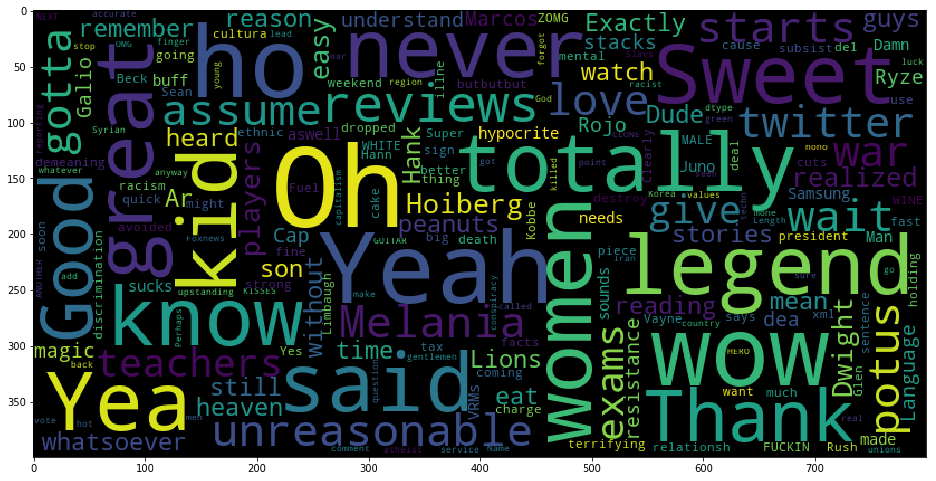

In [13]:
plt.figure(figsize=(16, 12))
wordcloud.generate(str(train_df.loc[train_df['label'] == 1, 'comment']))
plt.imshow(wordcloud);

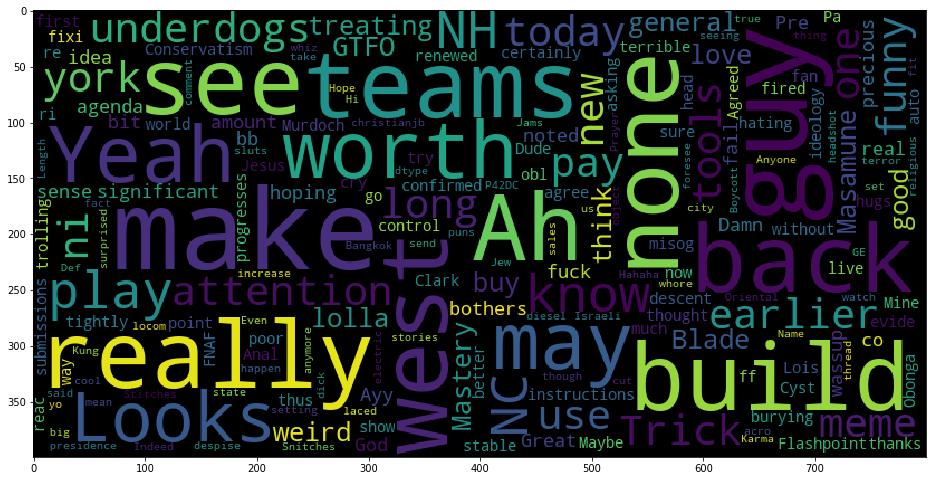

In [14]:
plt.figure(figsize=(16, 12))
wordcloud.generate(str(train_df.loc[train_df['label'] == 0, 'comment']))
plt.imshow(wordcloud);

In [15]:
sub_df = train_df.groupby('subreddit')['label'].agg([np.size, np.mean, np.sum])
sub_df.sort_values(by='sum', ascending=False).head(10)

size      mean    sum
subreddit                              
AskReddit        65674  0.401453  26365
politics         39493  0.605348  23907
worldnews        26376  0.642516  16947
leagueoflegends  21034  0.542312  11407
pcmasterrace     18987  0.566651  10759
news             16891  0.603457  10193
funny            17939  0.451474   8099
pics             16152  0.484336   7823
todayilearned    14159  0.547567   7753
GlobalOffensive  13738  0.552045   7584

In [16]:
sub_df[sub_df['size'] > 1000].sort_values(by='mean', ascending=False).head(10)

size      mean    sum
subreddit                              
creepyPMs         5466  0.784303   4287
MensRights        3355  0.680775   2284
ShitRedditSays    1284  0.661994    850
worldnews        26376  0.642516  16947
Libertarian       2562  0.640125   1640
atheism           7377  0.639555   4718
Conservative      1881  0.639553   1203
TwoXChromosomes   1560  0.632692    987
fatlogic          2356  0.623090   1468
facepalm          1268  0.617508    783

In [17]:
sub_df = train_df.groupby('author')['label'].agg([np.size, np.mean, np.sum])
sub_df[sub_df['size'] > 300].sort_values(by='mean', ascending=False).head(10)

size      mean  sum
author                             
NeonDisease      422  0.500000  211
ShyBiDude89      404  0.500000  202
ivsciguy         342  0.500000  171
mad-n-fla        318  0.500000  159
mindlessrabble   302  0.500000  151
pokemon_fetish   432  0.500000  216
Biffingston      845  0.499408  422

In [18]:
sub_df = train_df[train_df['score'] >= 0].groupby('score')['label'].agg([np.size, np.mean, np.sum])
sub_df[sub_df['size'] > 300].sort_values(by='mean', ascending=False).head(10)

size      mean    sum
score                        
0      58141  0.612752  35626
20      3096  0.561370   1738
34      1071  0.556489    596
26      1874  0.554429   1039
59       315  0.552381    174
18      3951  0.551759   2180
13      7277  0.546929   3980
17      4404  0.545867   2404
40       722  0.545706    394
27      1753  0.545351    956

In [19]:
sub_df = train_df[train_df['score'] < 0].groupby('score')['label'].agg([np.size, np.mean, np.sum])
sub_df[sub_df['size'] > 300].sort_values(by='mean', ascending=False).head(10)

size      mean   sum
score                       
-14      537  0.698324   375
-8      1852  0.696004  1289
-9      1503  0.691284  1039
-6      3088  0.688795  2127
-12      776  0.684278   531
-5      4134  0.678520  2805
-3      6736  0.676069  4554
-2     11924  0.675948  8060
-4      5436  0.673473  3661
-7      2424  0.672855  1631

In [20]:
# build bigrams, put a limit on maximal number of features
# and minimal word frequency
tf_idf = TfidfVectorizer(ngram_range=(1, 2), max_features=50000, min_df=2)
# multinomial logistic regression a.k.a softmax classifier
logit = LogisticRegression(C=1, n_jobs=4, solver='lbfgs', 
                           random_state=17, verbose=1)
# sklearn's pipeline
tfidf_logit_pipeline = Pipeline([('tf_idf', tf_idf), 
                                 ('logit', logit)])

In [21]:
%%time
tfidf_logit_pipeline.fit(train_texts, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


CPU times: user 31.1 s, sys: 1.11 s, total: 32.2 s
Wall time: 43.4 s


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:   11.4s finished


Pipeline(memory=None,
     steps=[('tf_idf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=50000, min_df=2,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=Tru... penalty='l2', random_state=17, solver='lbfgs', tol=0.0001,
          verbose=1, warm_start=False))])

In [22]:
%%time
valid_pred = tfidf_logit_pipeline.predict(valid_texts)

CPU times: user 6.63 s, sys: 195 ms, total: 6.82 s
Wall time: 6.84 s


In [23]:
accuracy_score(y_valid, valid_pred)

0.7200645840423595

In [24]:
def plot_confusion_matrix(actual, predicted, classes,
                          normalize=False,
                          title='Confusion matrix', figsize=(7,7),
                          cmap=plt.cm.Blues, path_to_save_fig=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(actual, predicted).T
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')
    
    if path_to_save_fig:
        plt.savefig(path_to_save_fig, dpi=300, bbox_inches='tight')

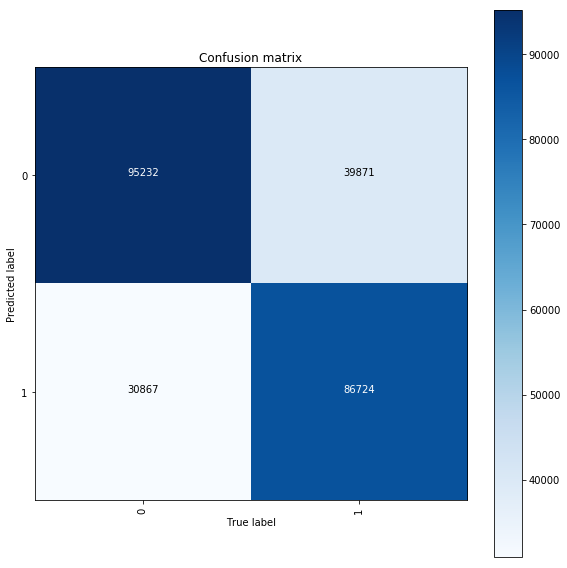

In [25]:
plot_confusion_matrix(y_valid, valid_pred, 
                      tfidf_logit_pipeline.named_steps['logit'].classes_, figsize=(8, 8))

In [27]:
import eli5
eli5.show_weights(estimator=tfidf_logit_pipeline.named_steps['logit'],
                  vec=tfidf_logit_pipeline.named_steps['tf_idf'])

In [28]:
subreddits = train_df['subreddit']
train_subreddits, valid_subreddits = train_test_split(subreddits, random_state=17)

In [29]:
tf_idf_texts = TfidfVectorizer(ngram_range=(1, 2), max_features=50000, min_df=2)
tf_idf_subreddits = TfidfVectorizer(ngram_range=(1, 1))

In [30]:
%%time
X_train_texts = tf_idf_texts.fit_transform(train_texts)
X_valid_texts = tf_idf_texts.transform(valid_texts)

CPU times: user 38.1 s, sys: 928 ms, total: 39 s
Wall time: 39.1 s


In [31]:
X_train_texts.shape, X_valid_texts.shape

((758079, 50000), (252694, 50000))

In [32]:
%%time
X_train_subreddits = tf_idf_subreddits.fit_transform(train_subreddits)
X_valid_subreddits = tf_idf_subreddits.transform(valid_subreddits)

CPU times: user 3.64 s, sys: 62.1 ms, total: 3.71 s
Wall time: 3.72 s


In [33]:
X_train_subreddits.shape, X_valid_subreddits.shape

((758079, 13255), (252694, 13255))

In [34]:
from scipy.sparse import hstack
X_train = hstack([X_train_texts, X_train_subreddits])
X_valid = hstack([X_valid_texts, X_valid_subreddits])

In [35]:
X_train.shape, X_valid.shape

((758079, 63255), (252694, 63255))

In [36]:
logit.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:   11.3s finished


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=4,
          penalty='l2', random_state=17, solver='lbfgs', tol=0.0001,
          verbose=1, warm_start=False)

In [37]:
%%time
valid_pred = logit.predict(X_valid)

CPU times: user 116 ms, sys: 17 ms, total: 133 ms
Wall time: 131 ms


In [38]:
accuracy_score(y_valid, valid_pred)

0.7166770877029134